# Semimajor axis

## Plots the evolution of the semi-major axis.

Import modules

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from glob import glob
import yaml

Configure Matplotlib 

In [2]:
# Config matplotlib
font = {'size'   : 22}
matplotlib.rc('font', **font)

Open and read parameters' file.

In [3]:
# Open yaml file
with open('../src/parameter.yaml') as stream:
    parameters = yaml.load(stream)

In [4]:
# Config parameters

# Project path
project_path = parameters['project_path']

# Prefix simulation
prefix_simulation = parameters['prefix_simulation']

# Raw data
data_path = parameters['data_path']

# Number of clones
n_clones = parameters['n_clones']

# Planets' names
planets = parameters['planets']

Each line represents the overlap of the evolution of the semi-major axis of each planet.

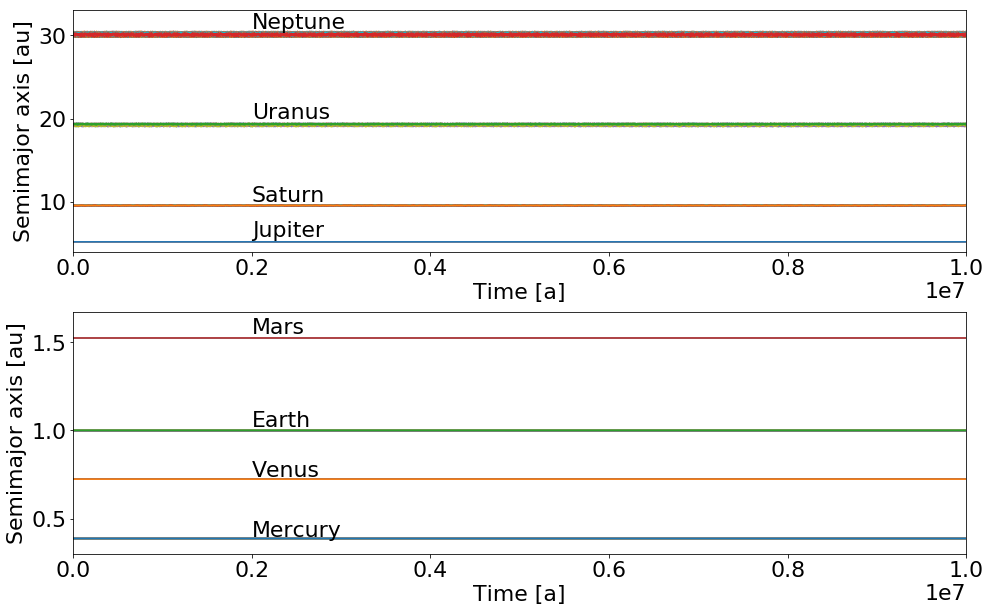

In [5]:
# Change work directory
os.chdir(project_path)

fig, axs = plt.subplots(2,1, figsize=(16,10),sharex=True)
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0.25)

# Giant planets
plt.subplot(211)
os.chdir(data_path)
for clone in range(1,n_clones + 1):
    os.chdir(prefix_simulation + str(clone))
    for planet in planets[4:8]:
        data = np.loadtxt(planet + ".txt")
        plt.plot(data[:,0], data[:,1])
    os.chdir("..")
os.chdir(data_path)

plt.xlim([0,1e7])
plt.ylim([4, 33])
plt.xlabel("Time [a]")
plt.ylabel("Semimajor axis [au]")
plt.text(0.2e7, 5.8, "Jupiter")
plt.text(0.2e7, 10, "Saturn")
plt.text(0.2e7, 20, "Uranus")
plt.text(0.2e7, 30.8, "Neptune")

# Inner planets
plt.subplot(212)
os.chdir(data_path)
for clone in range(1,n_clones + 1):
    os.chdir(prefix_simulation + str(clone))
    for planet in planets[0:4]:
        data = np.loadtxt(planet + ".txt")
        plt.plot(data[:,0], data[:,1])
    os.chdir("..")
os.chdir(data_path)

plt.xlim([0,1e7])
plt.ylim([0.3, 1.67])
plt.xlabel("Time [a]")
plt.ylabel("Semimajor axis [au]")
plt.text(0.2e7, 0.4, "Mercury")
plt.text(0.2e7, 0.74, "Venus")
plt.text(0.2e7, 1.023, "Earth")
plt.text(0.2e7, 1.55, "Mars")

os.chdir(project_path)